# Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their 
attributes such as 'crossing', 'finishing etc.<br>
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more 
than 10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment<br>
About the Dataset<br>
The ultimate Soccer database for data analysis and 
machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football 
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team 
formations, with player names and a pair of coordinates to indicate their position on the pitch.<br>
+25,000 matches<br>
+10,000 players<br>
11 European Countries with their lead championship<br>
Seasons 2008 to 2016<br>
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including 
the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for 
+10,000 matches<br>
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA 
video games. It is not just the stats that come with a new version of the game but also the weekly 
updates. So for instance if a player has performed poorly over a period of time and his stats get 
impacted in FIFA, you would normally see the same in the dataset.<br>
Python skills required to complete this project<br>
SQL:<br>
The data is in SQL database so students need to retrive using query language. They also need 
to know how to connect SQL database woth python. The library we are using for this in 'sqlite3'.
SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. 
It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. 
You do not need to install this module separately because it is shipped by default along with Python 
version 2.5.x onwards.<br>
To use sqlite3 module, you must first create a connection object that represents the database 
and then optionally you can create a cursor object, which will help you in executing all the SQL 
statements.<br>
Pandas:<br>
Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use 
data structures and data analysis tools for the Python programming language. Python with 
Pandas is used in a wide range of fields including academic and commercial domains including 
finance, economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of 
Python Pandas and how to use them in practice.<br>
Scikit Learn<br>
Scikit-learn provides a range of supervised and unsupervised learning algorithms via a 
consistent interface in Python.<br>
The library is built upon the SciPy (Scientific Python) that must be installed before you can 
use scikit-learn. This stack that includes:<br>
NumPy: Base n-dimensional array package<br>
SciPy: Fundamental library for scientific computing<br>
Matplotlib: Comprehensive 2D/3D plotting<br>
IPython: Enhanced interactive console<br>
Sympy: Symbolic mathematics<br>
Pandas: Data structures and analysis<br>
Extensions or modules for SciPy care conventionally named SciKits. As such, the module 
provides learning algorithms and is named scikit-learn.
The vision for the library is a level of robustness and support required for use in production systems. 
This means a deep focus on concerns such as easy of use, code quality, collaboration, 
documentation and performance.<br>
Machine Learning skills required to complete the 
project<br>
Supervised learning<br>
Supervised learning deals with learning a function from available training data. A supervised 
learning algorithm analyzes the training data and produces an inferred function, which can be 
used for mapping new examples.
Regression<br>
Regression is a parametric technique used to predict continuous (dependent) variable given a set 
of independent variables. It is parametric in nature because it makes certain assumptions 
(discussed next) based on the data set. If the data set follows those assumptions, regression gives 
incredible results.<br>
Model evaluation<br>
Student must know how to judge a model on unseen data. What metric to select to judge 
the performance

In [1]:
import sqlite3
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
import pickle

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
print(df)

            id  player_fifa_api_id  player_api_id                 date  \
0            1              218353         505942  2016-02-18 00:00:00   
1            2              218353         505942  2015-11-19 00:00:00   
2            3              218353         505942  2015-09-21 00:00:00   
3            4              218353         505942  2015-03-20 00:00:00   
4            5              218353         505942  2007-02-22 00:00:00   
...        ...                 ...            ...                  ...   
183973  183974              102359          39902  2009-08-30 00:00:00   
183974  183975              102359          39902  2009-02-22 00:00:00   
183975  183976              102359          39902  2008-08-30 00:00:00   
183976  183977              102359          39902  2007-08-30 00:00:00   
183977  183978              102359          39902  2007-02-22 00:00:00   

        overall_rating  potential preferred_foot attacking_work_rate  \
0                 67.0       71.0      

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
target = df.pop('overall_rating')

In [6]:
df.shape

(183978, 41)

In [7]:
target.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [8]:
target.isnull().sum()

836

In [9]:
target.describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

<IPython.core.display.Javascript object>


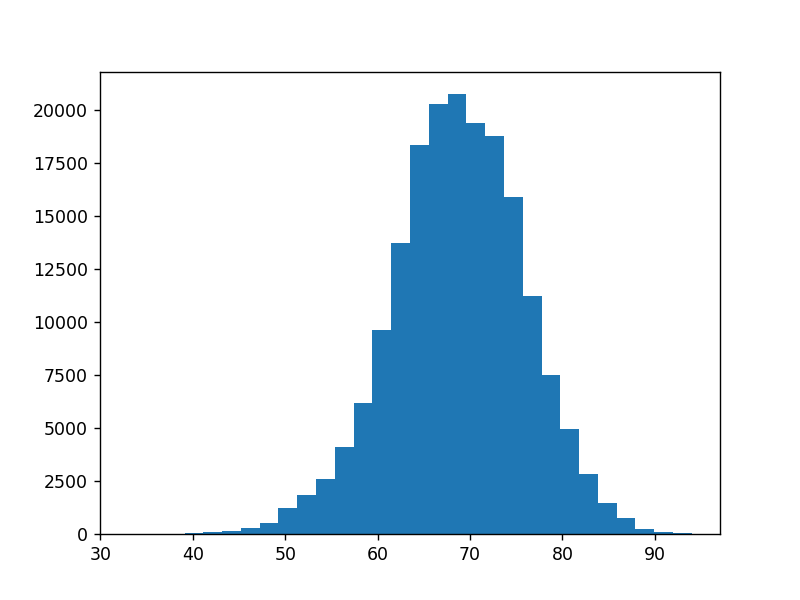

(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.5000e+01, 9.4000e+01,
        1.4200e+02, 2.9400e+02, 5.2600e+02, 1.2510e+03, 1.8450e+03,
        2.5780e+03, 4.0870e+03, 6.1890e+03, 9.6500e+03, 1.3745e+04,
        1.8366e+04, 2.0310e+04, 2.0773e+04, 1.9382e+04, 1.8784e+04,
        1.5915e+04, 1.1254e+04, 7.5250e+03, 4.9470e+03, 2.8290e+03,
        1.4590e+03, 7.4800e+02, 2.2800e+02, 8.4000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <BarContainer object of 30 artists>)

In [10]:
plt.hist(target, 30, range=(33, 94))

In [11]:
y = target.fillna(target.mean())

In [12]:
y.isnull().values.any()

False

In [13]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [14]:
for col in df.columns:
    unique_cat = len(df[col].unique())
    print("{col}--> {unique_cat}..{typ}".format(col=col, unique_cat=unique_cat, typ=df[col].dtype))

id--> 183978..int64
player_fifa_api_id--> 11062..int64
player_api_id--> 11060..int64
date--> 197..object
potential--> 57..float64
preferred_foot--> 3..object
attacking_work_rate--> 9..object
defensive_work_rate--> 20..object
crossing--> 96..float64
finishing--> 98..float64
heading_accuracy--> 97..float64
short_passing--> 96..float64
volleys--> 94..float64
dribbling--> 98..float64
curve--> 93..float64
free_kick_accuracy--> 98..float64
long_passing--> 96..float64
ball_control--> 94..float64
acceleration--> 87..float64
sprint_speed--> 86..float64
agility--> 82..float64
reactions--> 79..float64
balance--> 82..float64
shot_power--> 97..float64
jumping--> 80..float64
stamina--> 85..float64
strength--> 83..float64
long_shots--> 97..float64
aggression--> 92..float64
interceptions--> 97..float64
positioning--> 96..float64
vision--> 98..float64
penalties--> 95..float64
marking--> 96..float64
standing_tackle--> 96..float64
sliding_tackle--> 95..float64
gk_diving--> 94..float64
gk_handling--> 91..

In [15]:
dummy_df = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
dummy_df.head()

,id,player_fifa_api_id,player_api_id,date,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,1,218353,505942,2016-02-18 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,66.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
X = dummy_df.drop(['id', 'date'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [19]:
model = XGBRegressor()
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.0112063  0.01328359 0.16840546 0.01479726 0.00693286 0.02923344
 0.02684482 0.00141261 0.01633997 0.00142012 0.00089428 0.00336454
 0.05596948 0.00311885 0.00745351 0.00146221 0.3133247  0.00111532
 0.02715905 0.00230193 0.00448559 0.02142001 0.00503636 0.0047115
 0.01690763 0.01669931 0.00246637 0.00140508 0.02284729 0.05204851
 0.00592539 0.02880221 0.02403816 0.00703669 0.03812633 0.022119
 0.00037242 0.         0.00078061 0.00141978 0.00046924 0.00049927
 0.0007586  0.00086996 0.00040868 0.00098631 0.         0.
 0.         0.00204254 0.00125616 0.         0.00173628 0.
 0.0006331  0.         0.00087684 0.         0.         0.00092218
 0.00059731 0.00364412 0.00161083 0.         0.        ]


In [20]:
selection = SelectFromModel(model, threshold=0.01, prefit=True)

select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)
select_X_train.shape

(137983, 19)

In [21]:
scalar = StandardScaler()
x_scaled_train = scalar.fit_transform(select_X_train)
x_scaled_train

array([[ 1.0567811 ,  2.90118168, -0.37370531, ..., -0.69862488,
        -0.31949444, -0.49199125],
       [ 0.83239093,  1.11023832, -0.67788964, ..., -0.25617622,
        -0.25716519, -0.55033053],
       [ 0.17077907,  1.07420333,  0.38675551, ..., -0.12976231,
        -0.19483593, -0.55033053],
       ...,
       [-2.07758255, -0.8212941 ,  1.2993085 , ...,  0.31268635,
         0.30379811,  0.26641949],
       [ 0.44157109, -0.11639067,  0.99512417, ...,  0.37589331,
         0.36612736,  0.32475878],
       [ 0.22002412, -0.64891505,  1.755585  , ..., -0.69862488,
        -0.50648221, -0.2586341 ]])

In [22]:
x_scaled_test = scalar.fit_transform(select_X_test)
x_scaled_test

array([[ 0.5825465 ,  0.37577743,  1.14364038, ..., -0.69951284,
        -0.19548251, -0.08516627],
       [ 0.7131656 ,  0.14588373, -0.22328168, ..., -0.63646818,
        -0.19548251, -0.2013609 ],
       [ 0.2307514 , -0.78242149, -0.52704214, ..., -0.51037885,
        -0.00935998, -0.37565285],
       ...,
       [ 0.7233016 ,  0.76992259,  0.83987993, ..., -0.13211088,
        -0.13344167, -0.2013609 ],
       [ 0.71524098,  1.61776501,  0.6879997 , ..., -0.25820021,
        -0.50568674, -0.31755554],
       [ 0.90691696,  2.24229255, -1.74208398, ..., -0.25820021,
        -0.38160505, -0.31755554]])

In [23]:
# Linear Regression :
linear_reg = LinearRegression()
linear_reg.fit(x_scaled_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg.score(x_scaled_test, y_test)

0.848719468089193

In [24]:
cv = ShuffleSplit(random_state=0)   #defining type of cross_validation(shuffle spliting)

param_grid = {'n_jobs': [-1]}     #parameters for model tunning

grid = GridSearchCV(linear_reg, param_grid=param_grid, cv=cv)

In [25]:
grid.fit(select_X_train, y_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=None, train_size=None),
             estimator=LinearRegression(), param_grid={'n_jobs': [-1]})

In [26]:
grid.best_params_

{'n_jobs': -1}

In [27]:
grid.best_estimator_

LinearRegression(n_jobs=-1)

In [28]:
new_linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
new_linear_reg.fit(x_scaled_train, y_train)

LinearRegression(n_jobs=-1)

In [29]:
new_linear_reg.score(x_scaled_test, y_test)

0.848719468089193

In [30]:
# Decision Tree
decision_tree = DecisionTreeRegressor(criterion='mse', random_state=0)         #estimator
decision_tree.fit(x_scaled_train, y_train)

DecisionTreeRegressor(random_state=0)

In [31]:
cv = ShuffleSplit(n_splits=10, random_state=42)        #cross validation

param_grid = {'max_depth': [3, 5, 7, 9, 13],
             'criterion': ['mse', 'friedman_mse']}

grid = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv)

In [32]:
grid.fit(select_X_train, y_train)          #training

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=None),
             estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [3, 5, 7, 9, 13]})

In [33]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 13}

In [34]:
grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=13, random_state=0)

In [35]:
new_deci_tree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=24,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=45,
           splitter='best')
new_deci_tree.fit(x_scaled_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=24, random_state=45)

In [36]:
new_deci_tree.score(x_scaled_test, y_test)

0.9573918653268987

In [37]:
# Random Forest
rand_forest = RandomForestRegressor(random_state=123)
rand_forest.fit(x_scaled_train, y_train)

RandomForestRegressor(random_state=123)

In [38]:
rand_forest.score(x_scaled_test, y_test)

0.9797116517014308

In [39]:
cv = ShuffleSplit(test_size=0.2, random_state=0)

param_grid = {'max_features':['sqrt', 'log2', 10],
              'max_depth':[9, 11, 13]}                 

grid = GridSearchCV(rand_forest, param_grid=param_grid, cv=cv)

In [40]:
grid.fit(x_scaled_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [9, 11, 13],
                         'max_features': ['sqrt', 'log2', 10]})

In [41]:
grid.best_estimator_

RandomForestRegressor(max_depth=13, max_features=10, random_state=123)

In [42]:
new_rand_forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=33,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
new_rand_forest.fit(x_scaled_train, y_train)

RandomForestRegressor(max_depth=33, max_features=10, n_estimators=10, n_jobs=1,
                      random_state=42)

In [43]:
new_rand_forest.score(x_scaled_test, y_test)

0.9787384737336855

In [44]:
# XGBoost Regressor
xgr = XGBRegressor(random_state=42)
xgr.fit(x_scaled_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
xgr.score(x_scaled_test, y_test)

0.9612268302162874

In [46]:
cv = ShuffleSplit(n_splits=10, random_state=0)

param_grid = {'max_depth': [5, 7],
              'learning_rate': [0.1, 0.3]}

grid = GridSearchCV(xgr, param_grid=param_grid, cv=cv, n_jobs= -1)

In [47]:
grid.fit(x_scaled_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=None, train_size=None),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=16,
                                    num_parallel_tree=1, random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validat

In [48]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
new_xgr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=1, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
new_xgr.fit(x_scaled_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=1)

In [50]:
new_xgr.score(x_scaled_test, y_test)

0.9652303415162796

In [51]:
print("""Linear Regressor accuracy is {lin}
DecisionTree Regressor accuracy is {Dec}
RandomForest regressor accuracy is {ran}
XGBoost regressor accuracy is {xgb}""".format(lin=new_linear_reg.score(x_scaled_test, y_test),
                                                       Dec=new_deci_tree.score(x_scaled_test, y_test),
                                                       ran=new_rand_forest.score(x_scaled_test, y_test),
                                                       xgb=new_xgr.score(x_scaled_test, y_test)))

Linear Regressor accuracy is 0.848719468089193
DecisionTree Regressor accuracy is 0.9573918653268987
RandomForest regressor accuracy is 0.9787384737336855
XGBoost regressor accuracy is 0.9652303415162796


By accuracy comparision performed above we can say hear that Random Forest regressor gives better result than any other model. and it can predict the target function with approx 98% accuracy.